# Linear Regression Model for Salary Prediction 

##### The following notebook makes use of a linear regression model, a supervised machine learning technique, to predict the future salaries of employees based primarily on the number of years they have worked. Because we are only focusing on the number of years worked as an influencing factor, this is known an univariate linear regression. Linear Regression is based on the straight line equation Y = mX + C. The table of contents for the notebook is as follows: 

##### 1. Train and Test split 
##### 1.1 Data description  
##### 1.2 Data Split and EDA: The data is randomly split with 80% of the data being used to train the model and 20% being used for testing it. The data is also visualized for distributions, patterns and outliers 

##### 2. Simple Linear Regression Model
##### 2.1 A simple linear regression model is performed using the statsmodel API with "Years worked" as the predictor value
##### 2.2 Interpretation of model results

##### 3. Confidence Intervals
##### 3.1 The 95% confidence level is calculated and interpreted
##### 3.2 Boxplot Visualization of confidence 95% confidence interval

##### 4. Predictions 
##### 4.1 The salary for someone with 12 years work experience is calculated 
##### 4.2 The salary of someone with 80 years work experience is calculated 

##### 5. Conclusion
##### The relationship between salaries and other factors that may contribute to this number are considered

## Train and Test split 
### Data description

In [2]:
# Packages are imported 
import pandas as pd
import matplotlib.pyplot as plt   
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [3]:
# A dataframe is created from the salary data 
salaries = pd.read_csv("salary.csv")
salaries.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [4]:
salaries.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [5]:
salaries.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [6]:
# The null value is replaced with the salary mean value
salaries['salary'].fillna(value = salaries['salary'].mean(), inplace = True)

### Data Split and EDA: The data is randomly split with 80% of the data being used to train the model and 20% being used for testing it. The data is also visualized for distributions and checked for linearity to apply the linear regression model  

In [84]:
# Reshape the data
X = salaries['yearsworked']
y = salaries['salary']

# The data is split into a test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

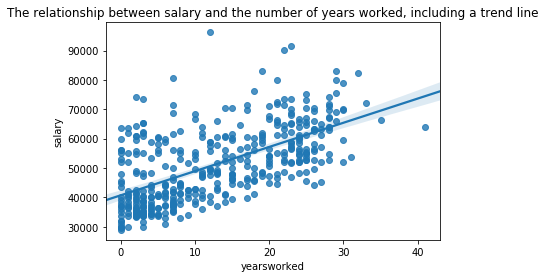

In [85]:
# Visualize the training data in order to see if a similar linear relationship is still observed
sns.regplot(X_train, y_train);
plt.title('The relationship between salary and the number of years worked, including a trend line');

##### The scatterplot above and trendline clearly show that a linear relationship exists between the salaries earned and the number of years worked by employees. This makes the data a good fit for a linear regression model. 

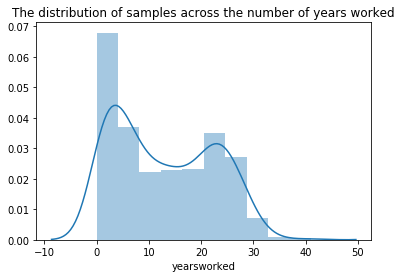

In [86]:
# The distribution is now visualized
sns.distplot(X);
plt.title('The distribution of samples across the number of years worked');

##### What is observed in the distribution above is a bimodal distribution. This implies that there are two different groups of employees within the dataset. There are those who have relatively high salaries despite working for less than 10 years. There is another group of employees who have relatively high salaries having worked more than 20 years.

## Simple Linear Regression Model
### A simple linear regression model is performed using the statsmodel API with "Years worked" as the predictor value

In [95]:
# Build model
splits = [X_train, X_test, y_train, y_test]

for i in splits: 
    i = (np.array(i))
    i = i.reshape(-1, 1)

X_train = sm.add_constant(X_train) # adding a constant
SLR_model = sm.OLS(y_train, X_train).fit()
print(SLR_model.params)

const          40722.352949
yearsworked      822.965820
dtype: float64


In [96]:
model_summary = SLR_model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     241.1
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           4.45e-43
Time:                        01:25:21   Log-Likelihood:                -4373.8
No. Observations:                 411   AIC:                             8752.
Df Residuals:                     409   BIC:                             8760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.072e+04    842.645     48.327      

### Interpretation of model results

##### The R-squared(variance) and adjusted R-squared value is how well the model fits the data. Our model returned a values of 0.371 and 0.369 respectively. This means that the model fits the data poorly, predicting only 37,1% of the salaries correctly. The P-value( P > | t |) is 0.00.This is far lower than the significance threshold of 0.05 meaning that the relationship between salaries and the number of years worked is statistically significant. 

##### The standard error or standard deviation is recorded as 71.23%. This means that the number of years worked accounts for 71,23% of salary changes. In other words, the factor 'Years Worked' affects 'Salaries' by 71.23%. 

#### The constant coefficient is 4.012e+04. This is the y-intercept; the value of the salary if the number of years worked was 0. The 'yearsworked' coefficient is 2864.3651.  This is effectively the change in salary due to one unit change in the years worked. The change is large which further confirms that the years worked has a strong positive linear relationship with the salaries observed. 

## Confidence Levels 
### The 95% confidence level is calculated and interpreted. 

##### The Confidence levels of the train dataset is [2724.422    3004.308] for [0.025   0.975].  Linear regression is a high bias-low variance model. This means that under multiple sampling, the line y=mx + c will remain approximately in the same posotion(low variance) but the average of the models will not reflect the true relationship(high bias). If the data was sampled 100 times, approximately 95 of the confidence levels would have the true (m) coefficient.

                       0            1
yearsworked  2676.897592  2999.787614


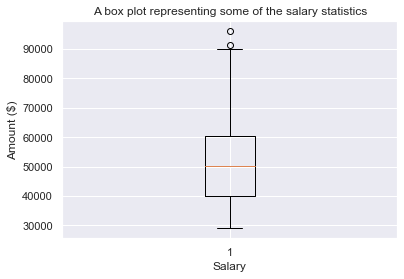

In [13]:
# A boxplot with error bars is plotted to show the confidence levels. Print the confidence 
# intervals for the model coefficients
print(SLR_model.conf_int())

sns.set()
_ = plt.boxplot(salaries['salary'])
_ = plt.xlabel('Salary')
_ = plt.ylabel('Amount ($)')
_ = plt.title('A box plot representing some of the salary statistics')
plt.show()


##  Predictions 

##### y = mx + c : salary = (gradient)(yearsworked) + (constant coefficient)
##### where m = 40 722.35 and c = 822.97

### The salary for someone with 12 years work experience is calculated 
##### The predicted salary for someone who has worked 12 years can be calculated as follows: 

In [98]:
# The salary for 12 years worked is manually calculated
m = 40722.35
c = 822.97
y = (m*12) + c
print(y)

489491.1699999999


In [102]:
# The model is now used to predict the value
new_x = np.array(12).reshape(-1, 1)
SLR_model.predict(new_x)

ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

### The salary of someone with 80 years work experience is calculated 

In [100]:
# The salary for 80 years worked is manually calculated
m = 40722.35
c = 822.97
y = (m*80) + c
print(y)

3258610.97


In [101]:
# The model is now used to predict the value
new_x = np.array(80).reshape(-1, 1)
SLR_model.predict(new_x)

ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [103]:
# The model is ran on the test data and the RMSE is calculated for the traing and test data 
train_prediction = SLR_model.predict(x_train['salary'])
np.sqrt(mean_squared_error(y_train, train_prediction))

KeyError: 'salary'

In [107]:
test_prediction = SLR_model.predict(x_test['salary'])
np.sqrt(mean_squared_error(y_test, test_prediction))

151411621.95985886

In [111]:
x = x_test['yearsworked']
y = x_test['salary']
test_model = smf.ols('y ~ x', data = x_test).fit() 
test_model.params

Intercept    40173.688001
x              833.630197
dtype: float64

In [113]:
test_model_summary = test_model.summary()
print(test_model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     81.26
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           1.32e-14
Time:                        01:20:32   Log-Likelihood:                -1084.8
No. Observations:                 103   AIC:                             2174.
Df Residuals:                     101   BIC:                             2179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.017e+04   1515.110     26.515      0.0

##### The model has a 44.6% variance or fit. This needs improvement.

## Conclusion
### The relationship between salaries and other factors that may contribute to this number are considered

In [103]:
# A correlation matrix is drawn
salaries.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.498485,-0.069622
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044552,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.167129,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.361447,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.498485,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


##### It appears the position held has a higher correlation than the years worked do with the salary. This may explain te bimodal distribution seen earlier.